In [6]:
"""
Jupyter notebook containing an example of antisolvent screening.
Solute of the system is 'glutaric acid'.
Solvent of the system is '1-Butanol'.

Property and calculated data are stored in './data' folder.
"""

"\nJupyter notebook containing an example of antisolvent screening.\nSolute of the system is 'glutaric acid'.\nSolvent of the system is '1-Butanol'.\n\nProperty and calculated data are stored in './data' folder.\n"

In [3]:
import os
import sys
import numpy as np
import pandas
import matplotlib.pyplot as plt
import ternary
import json

sys.path.append("..")
from cosmosac2 import COSMOMolecule, COSMOSAC
from ternary_calculate import TernaryCalculate as tc
from antisolvent_calculate import AntisolventCalculate as ac

In [8]:
# Solute properties
solute = {
    "temp_melt": 370.9,
    "enth_fus": 20700,
    "file": "../cosmo_file/UD1078.cosmo",
    "name": "GLUTARIC_ACID",
}
# Solvent properties
solvent = {
    "temp_melt": 184.552,
    "enth_fus": 9372.16,
    "file": "../cosmo_file/UD34.cosmo",
    "name": "1-BUTANOL",
}

In [9]:
# Load antisolvent data
with open("./data/antisolvent_properties.json", "r") as json_file:
    antisolv_data = json.load(json_file)

System: GLUTARIC_ACID-1-BUTANOL-TOLUENE
Initializing system...
Initialize complete!
System: GLUTARIC_ACID-1-BUTANOL-ACETIC_ACID
Initializing system...
Initialize complete!
System: GLUTARIC_ACID-1-BUTANOL-N-HEXANE
Initializing system...
Initialize complete!
System: GLUTARIC_ACID-1-BUTANOL-CYCLOHEXANE
Initializing system...
Initialize complete!
System: GLUTARIC_ACID-1-BUTANOL-METHANOL
Initializing system...
Initialize complete!
System: GLUTARIC_ACID-1-BUTANOL-ETHANOL
Initializing system...
Initialize complete!
System: GLUTARIC_ACID-1-BUTANOL-ACETONITRILE
Initializing system...
Initialize complete!
System: GLUTARIC_ACID-1-BUTANOL-ACETONE
Initializing system...
Initialize complete!


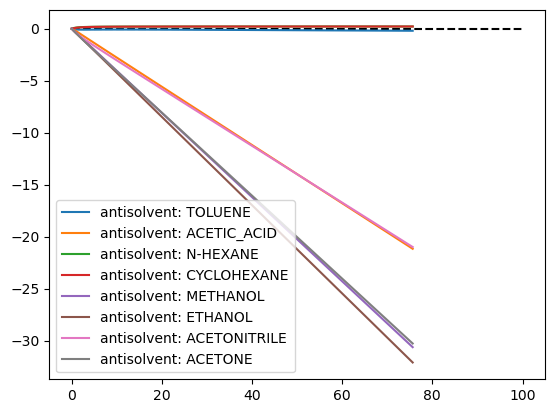

In [10]:
system = tc()
system.add_solute(**solute)
system.add_solvent(**solvent)
fig = plt.figure()
plt.hlines(0, 0, 100, colors="black", linestyles="dashed")
for antisolvent in antisolv_data:
    system.add_antisolvent(**antisolvent)
    antisolv_calculator = ac(system, trace=False)
    result = antisolv_calculator.get_data(
        export="csv", file_name=f"./data/calculate_{antisolvent['name']}.csv"
    )
    plt.plot(
        result["add_antisolv_mole"],
        result["precip_mole"],
        label=f"antisolvent: {system.mole_name[2]}",
    )
    system.clear_antisolvent()

plt.legend(loc="best")
plt.show()

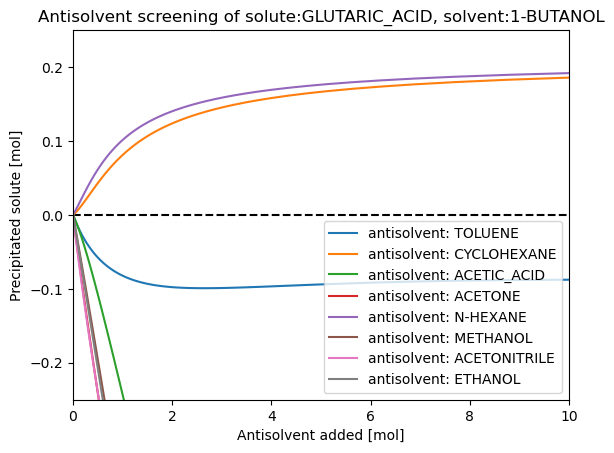

In [11]:
# Get a better view of the plot
fig2 = plt.figure()
plt.hlines(0, 0, 100, colors="black", linestyles="dashed")
for csv_data_file in os.listdir("./data"):
    if "calculate" in csv_data_file:
        data = pandas.read_csv("./data/" + csv_data_file)
        plt.plot(
            data["add_antisolv_mole"],
            data["precip_mole"],
            label=f"antisolvent: {csv_data_file[10:-4]}",
        )
plt.xlabel("Antisolvent added [mol]")
plt.ylabel("Precipitated solute [mol]")
plt.title(
    f"Antisolvent screening of solute:{solute['name']}, solvent:{solvent['name']}"
)
plt.legend(loc="best")
plt.xlim([0, 10])
plt.ylim([-0.25, 0.25])
fig2.savefig("./images/antisolvent_screening.png")
plt.show()